Example Code from:

https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

f(x) = x * sin(x)

In [2]:
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

In [3]:
X.shape

(1000, 1)

Text(0, 0.5, '$f(x)$')

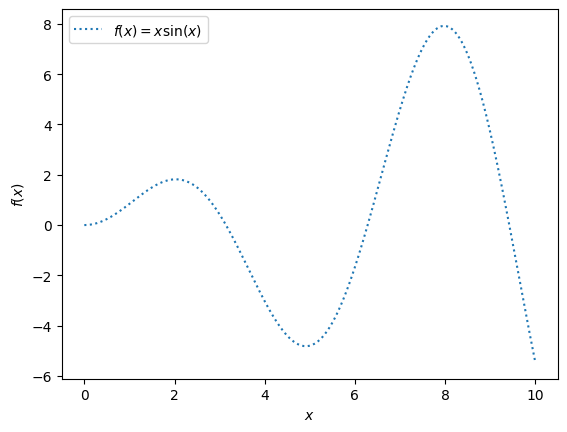

In [4]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

In [5]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

In [6]:
y_train

array([-4.74492726,  7.73514288, -4.44491693, -1.90051689,  1.5957965 ,
        1.16380401])

In [7]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

5.02**2 * RBF(length_scale=1.43)

Text(0, 0.5, '$f(x)$')

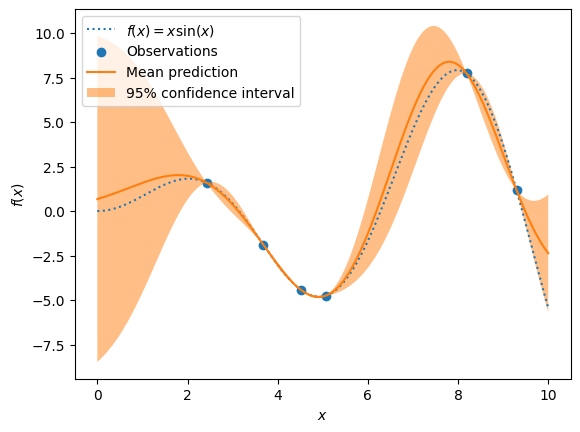

In [8]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

In [9]:
noise_std = 0.75
y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)

In [10]:
gaussian_process = GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9
)
gaussian_process.fit(X_train, y_train_noisy)
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

Text(0, 0.5, '$f(x)$')

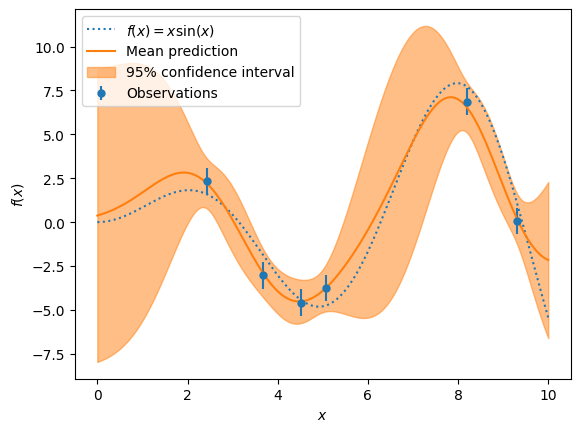

In [11]:
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.errorbar(
    X_train,
    y_train_noisy,
    noise_std,
    linestyle="None",
    color="tab:blue",
    marker=".",
    markersize=10,
    label="Observations",
)
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    color="tab:orange",
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")

https://domino.ai/blog/fitting-gaussian-process-models-python#body__5b6ea80717d6

Test Patient

In [6]:
import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *
import ipywidgets as widgets

In [13]:
from connection import *

con = connect()
df = SQL("select * from constant_therapy.q3", con)

Connection Successful


In [7]:
df = pd.read_csv("data/raw_percentile.csv")
df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time_min,deficit_id,disorder_id,domain_id,progression_order,percentile
0,639141,15796,20,1,2,0.032,5y,1950,2014-08-02,2014-08-02 21:11:37,2014-08-02 21:11:40,"{1, 2, 3, 4, 8}","{2, 3}",1,0,0.010932
1,659924,16441,20,1,3,1.000,6m,1959,2014-08-08,2014-08-08 16:21:14,2014-08-08 16:21:54,"{1, 2, 3, 4}",{2},1,0,0.010932
2,677465,16441,20,1,3,1.000,6m,1959,2014-08-13,2014-08-13 01:07:54,2014-08-13 01:08:17,"{1, 2, 3, 4}",{2},1,0,0.010932
3,677586,16441,20,1,3,1.000,6m,1959,2014-08-13,2014-08-13 01:36:48,2014-08-13 01:37:13,"{1, 2, 3, 4}",{2},1,0,0.010932
4,679091,16441,20,1,3,1.000,6m,1959,2014-08-13,2014-08-13 16:15:30,2014-08-14 02:40:50,"{1, 2, 3, 4}",{2},1,0,0.010932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601853,4662260,82474,75,1,10,0.780,1y,1983,2016-09-20,2016-09-20 18:52:46,2016-09-20 18:57:20,"{1, 2, 3, 4}","{2, 3}",8,3,0.328086
1601854,4682259,82474,75,1,10,0.870,1y,1983,2016-09-22,2016-09-22 17:29:06,2016-09-22 17:33:08,"{1, 2, 3, 4}","{2, 3}",8,3,0.328086
1601855,4698670,82474,75,1,10,0.900,1y,1983,2016-09-24,2016-09-24 15:58:14,2016-09-24 16:03:42,"{1, 2, 3, 4}","{2, 3}",8,3,0.328086
1601856,4704074,82474,75,1,10,0.900,1y,1983,2016-09-25,2016-09-25 14:45:49,2016-09-25 14:53:32,"{1, 2, 3, 4}","{2, 3}",8,3,0.328086


In [15]:
import random
pid = random.choice(pd.unique(df["patient_id"]))
print(pid)
data = df[df.patient_id == pid].reset_index()
data

17055


,index,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time_min,deficit_id,disorder_id,domain_id,progression_order,percentile
0,6356,2370997,17055,20,5,5,0.926,6m,1955,2015-09-16,2015-09-16 19:10:02,2015-09-16 19:13:39,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,4,0.178632
1,6357,2376289,17055,20,5,5,0.987,6m,1955,2015-09-17,2015-09-17 20:07:44,2015-09-17 20:10:42,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,4,0.178632
2,6358,2382063,17055,20,5,5,0.938,6m,1955,2015-09-18,2015-09-18 21:18:18,2015-09-18 21:21:06,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,4,0.178632
3,6359,2397595,17055,20,5,5,0.987,6m,1955,2015-09-22,2015-09-22 20:26:27,2015-09-22 20:29:20,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,4,0.178632
4,6360,2412776,17055,20,5,6,0.968,6m,1955,2015-09-25,2015-09-25 23:16:26,2015-09-25 23:20:10,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,4,0.178632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,1570761,3878505,17055,13,1,8,0.875,6m,1955,2016-06-13,2016-06-13 21:21:22,2016-06-13 21:23:15,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",2,10,0.630529
810,1576202,681372,17055,13,2,3,0.333,6m,1955,2014-08-14,2014-08-14 04:11:07,2014-08-14 04:23:03,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",2,11,0.722093
811,1576203,3335623,17055,13,2,7,0.428,6m,1955,2016-03-21,2016-03-21 20:55:41,2016-03-24 18:13:20,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",2,11,0.722093
812,1576204,3426597,17055,13,2,2,0.000,6m,1955,2016-04-05,2016-04-05 20:38:00,2016-04-05 20:38:10,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",2,11,0.722093


In [8]:
data = data.sort_values(by="end_time_min").reset_index()

NameError: name 'data' is not defined

In [17]:
# since regression doesn't work on date data, we have to convert it to numerical values
import time
data["convert_end_time"] = pd.to_datetime(data.end_time_min)
data['convert_end_time'] = data['convert_end_time'].apply(lambda  v: v.timestamp())
data

,level_0,index,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time_min,deficit_id,disorder_id,domain_id,progression_order,percentile,convert_end_time
0,251,542000,681352,17055,41,1,3,1.000,6m,1955,2014-08-14,2014-08-14 03:44:09,2014-08-14 03:44:26,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",10,1,0.049406,1.407988e+09
1,135,194285,681353,17055,42,1,3,1.000,6m,1955,2014-08-14,2014-08-14 03:47:08,2014-08-14 03:47:08,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",4,0,0.090041,1.407988e+09
2,364,829338,681354,17055,23,2,3,1.000,6m,1955,2014-08-14,2014-08-14 03:47:15,2014-08-14 03:47:15,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",13,2,0.154591,1.407988e+09
3,711,1520026,681356,17055,27,1,2,1.000,6m,1955,2014-08-14,2014-08-14 03:47:29,2014-08-14 03:47:37,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",3,0,0.011681,1.407988e+09
4,123,164614,681357,17055,27,6,2,0.750,6m,1955,2014-08-14,2014-08-14 03:48:20,2014-08-14 03:49:22,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",3,8,0.619994,1.407988e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,447,894641,3878504,17055,29,4,8,0.873,6m,1955,2016-06-12,2016-06-12 23:09:37,2016-06-13 21:20:50,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",14,17,0.637192,1.465853e+09
810,809,1570761,3878505,17055,13,1,8,0.875,6m,1955,2016-06-13,2016-06-13 21:21:22,2016-06-13 21:23:15,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",2,10,0.630529,1.465853e+09
811,508,967713,3878506,17055,2,1,9,1.000,6m,1955,2016-06-13,2016-06-13 21:24:14,2016-06-13 21:26:36,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",6,10,0.632929,1.465853e+09
812,582,1201703,3878507,17055,70,3,9,0.667,6m,1955,2016-06-13,2016-06-13 21:27:39,2016-06-13 21:35:00,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",10,21,0.922879,1.465854e+09


In [18]:
d1 = data[data.domain_id == 1]
d1

,level_0,index,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time_min,deficit_id,disorder_id,domain_id,progression_order,percentile,convert_end_time
11,448,916372,681364,17055,20,2,2,0.900,6m,1955,2014-08-14,2014-08-14 03:57:35,2014-08-14 03:57:54,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,1,0.040050,1.407989e+09
12,453,918751,681365,17055,22,2,3,0.667,6m,1955,2014-08-14,2014-08-14 03:58:24,2014-08-14 04:00:29,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,12,0.982520,1.407989e+09
16,11,40132,681370,17055,37,1,2,0.813,6m,1955,2014-08-14,2014-08-14 04:07:56,2014-08-14 04:09:07,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,10,0.759952,1.407989e+09
23,449,916373,710140,17055,20,2,5,0.980,6m,1955,2014-08-23,2014-08-23 06:57:53,2014-08-23 06:59:31,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,1,0.040050,1.408777e+09
31,454,918752,710149,17055,22,2,5,0.800,6m,1955,2014-08-25,2014-08-25 19:32:27,2014-08-25 19:38:52,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,12,0.982520,1.408996e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,42,40163,3579395,17055,37,1,7,0.964,6m,1955,2016-04-28,2016-04-28 20:30:50,2016-04-28 20:33:29,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,10,0.759952,1.461876e+09
789,80,97210,3837527,17055,21,4,7,0.950,6m,1955,2016-06-06,2016-06-06 20:48:17,2016-06-06 20:56:51,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,8,0.485732,1.465247e+09
798,43,40164,3837532,17055,37,1,7,0.928,6m,1955,2016-06-06,2016-06-06 21:16:06,2016-06-06 21:02:06,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,10,0.759952,1.465247e+09
801,81,105503,3878496,17055,21,5,5,0.912,6m,1955,2016-06-12,2016-06-12 22:10:11,2016-06-12 22:14:40,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,9,0.546761,1.465770e+09


<Axes: xlabel='convert_end_time', ylabel='progression_order'>

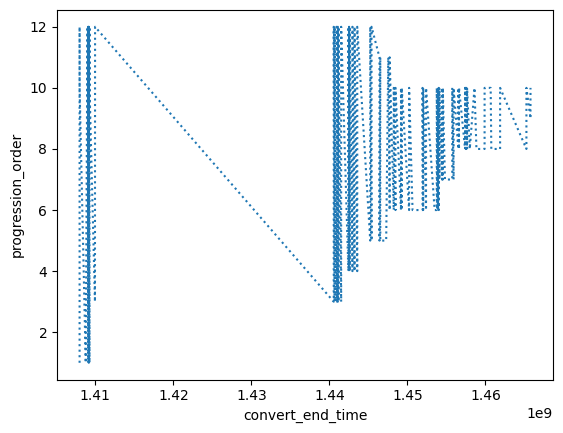

In [19]:
sns.lineplot(data=d1, x="convert_end_time", y="progression_order", linestyle=":")

In [20]:
d1.head()

,level_0,index,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time_min,deficit_id,disorder_id,domain_id,progression_order,percentile,convert_end_time
11,448,916372,681364,17055,20,2,2,0.900,6m,1955,2014-08-14,2014-08-14 03:57:35,2014-08-14 03:57:54,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,1,0.040050,1.407989e+09
12,453,918751,681365,17055,22,2,3,0.667,6m,1955,2014-08-14,2014-08-14 03:58:24,2014-08-14 04:00:29,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,12,0.982520,1.407989e+09
16,11,40132,681370,17055,37,1,2,0.813,6m,1955,2014-08-14,2014-08-14 04:07:56,2014-08-14 04:09:07,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,10,0.759952,1.407989e+09
23,449,916373,710140,17055,20,2,5,0.980,6m,1955,2014-08-23,2014-08-23 06:57:53,2014-08-23 06:59:31,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,1,0.040050,1.408777e+09
31,454,918752,710149,17055,22,2,5,0.800,6m,1955,2014-08-25,2014-08-25 19:32:27,2014-08-25 19:38:52,"{1, 2, 3, 4, 5, 6, 7, 8}","{2, 3}",1,12,0.982520,1.408996e+09


In [21]:
X = np.array([[c] for c in d1["convert_end_time"]])
Y = np.array(d1["percentile"])

In [22]:
Y.shape

(119,)

In [23]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(Y.size), size=int(X.size*0.75), replace=False)

In [24]:
X_train, Y_train = X[training_indices], Y[training_indices]

In [25]:
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel

kernel = ConstantKernel() + Matern(length_scale=1, nu=3/2) + WhiteKernel(noise_level=1)
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, Y_train)
gaussian_process.kernel_

0.63**2 * RBF(length_scale=42.1)

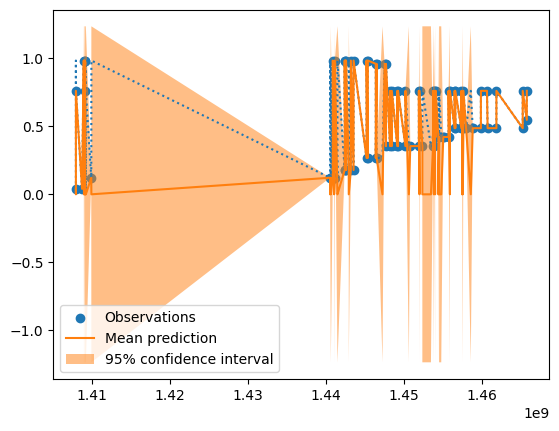

In [26]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, Y, linestyle="dotted")
plt.scatter(X_train, Y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()

In [27]:
def GPR(data, domain, split):
    rng = np.random.RandomState(1)

    data = data.sort_values(by="end_time_min").reset_index()
    data["convert_end_time"] = pd.to_datetime(data.end_time_min)
    data['convert_end_time'] = data['convert_end_time'].apply(lambda  v: v.timestamp())
    data = data[data.domain_id == domain]

    X = np.array([[c] for c in data["convert_end_time"]])
    Y = np.array(data["percentile"])
    training_indices = rng.choice(np.arange(Y.size), size=int(X.size*split), replace=False)
    X_train, Y_train = X[training_indices], Y[training_indices]

    # kernel = ConstantKernel() + Matern(length_scale=1, nu=3/2) + WhiteKernel(noise_level=1)
    kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    gaussian_process.fit(X_train, Y_train)

    mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

    return X, Y, X_train, Y_train, mean_prediction, std_prediction

In [28]:
pd.unique(data.domain_id)

array([10,  4, 13,  3,  6, 14,  1, 12,  2,  9,  5,  7])

In [29]:
import random
pid = random.choice(pd.unique(df["patient_id"]))
data = df[df.patient_id == pid].reset_index()
pd.unique(data.domain_id)

array([ 1,  3,  4, 10,  9, 12, 13])

Text(0.5, 1.0, '79700, domain 12')

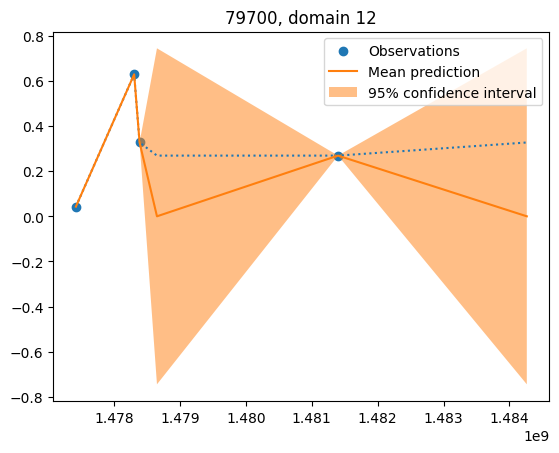

In [30]:
domain = 12
X, Y, X_train, Y_train, mean_prediction, std_prediction = GPR(data, domain, 0.75)

plt.plot(X, Y, linestyle="dotted")
plt.scatter(X_train, Y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.title("%d, domain %d" %(pid, domain))

Correlation

In [31]:
import random
pid = random.choice(pd.unique(df["patient_id"]))
print(pid)
data = df[df.patient_id == pid].reset_index()
data

43118


,index,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time_min,deficit_id,disorder_id,domain_id,progression_order,percentile
0,1156,2353698,43118,20,1,10,0.938,2y,1948,2015-09-13,2015-09-13 02:44:17,2015-09-13 02:49:37,"{1, 2, 3, 4}","{2, 3}",1,0,0.010932
1,1157,2356270,43118,20,1,10,0.987,2y,1948,2015-09-13,2015-09-13 23:55:50,2015-09-13 23:59:57,"{1, 2, 3, 4}","{2, 3}",1,0,0.010932
2,1158,2363354,43118,20,1,10,0.950,2y,1948,2015-09-15,2015-09-15 14:49:18,2015-09-15 14:53:24,"{1, 2, 3, 4}","{2, 3}",1,0,0.010932
3,1159,2366759,43118,20,1,10,0.962,2y,1948,2015-09-15,2015-09-15 23:18:08,2015-09-15 23:22:08,"{1, 2, 3, 4}","{2, 3}",1,0,0.010932
4,1160,2404562,43118,20,1,10,0.950,2y,1948,2015-09-24,2015-09-24 13:18:23,2015-09-24 13:22:28,"{1, 2, 3, 4}","{2, 3}",1,0,0.010932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,1097597,2579127,43118,20,3,9,0.954,2y,1948,2015-10-31,2015-10-31 13:35:50,2015-10-31 13:41:59,"{1, 2, 3, 4}","{2, 3}",1,2,0.079051
253,1097598,2579251,43118,20,3,9,1.000,2y,1948,2015-11-02,2015-11-02 16:30:10,2015-11-02 16:34:54,"{1, 2, 3, 4}","{2, 3}",1,2,0.079051
254,1097599,2601558,43118,20,3,9,0.981,2y,1948,2015-11-04,2015-11-04 19:40:19,2015-11-04 19:46:29,"{1, 2, 3, 4}","{2, 3}",1,2,0.079051
255,1097600,3511251,43118,20,3,10,0.984,2y,1948,2016-04-18,2016-04-18 20:52:47,2016-04-18 20:59:08,"{1, 2, 3, 4}","{2, 3}",1,2,0.079051


In [32]:
data

,index,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time_min,deficit_id,disorder_id,domain_id,progression_order,percentile
0,1156,2353698,43118,20,1,10,0.938,2y,1948,2015-09-13,2015-09-13 02:44:17,2015-09-13 02:49:37,"{1, 2, 3, 4}","{2, 3}",1,0,0.010932
1,1157,2356270,43118,20,1,10,0.987,2y,1948,2015-09-13,2015-09-13 23:55:50,2015-09-13 23:59:57,"{1, 2, 3, 4}","{2, 3}",1,0,0.010932
2,1158,2363354,43118,20,1,10,0.950,2y,1948,2015-09-15,2015-09-15 14:49:18,2015-09-15 14:53:24,"{1, 2, 3, 4}","{2, 3}",1,0,0.010932
3,1159,2366759,43118,20,1,10,0.962,2y,1948,2015-09-15,2015-09-15 23:18:08,2015-09-15 23:22:08,"{1, 2, 3, 4}","{2, 3}",1,0,0.010932
4,1160,2404562,43118,20,1,10,0.950,2y,1948,2015-09-24,2015-09-24 13:18:23,2015-09-24 13:22:28,"{1, 2, 3, 4}","{2, 3}",1,0,0.010932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,1097597,2579127,43118,20,3,9,0.954,2y,1948,2015-10-31,2015-10-31 13:35:50,2015-10-31 13:41:59,"{1, 2, 3, 4}","{2, 3}",1,2,0.079051
253,1097598,2579251,43118,20,3,9,1.000,2y,1948,2015-11-02,2015-11-02 16:30:10,2015-11-02 16:34:54,"{1, 2, 3, 4}","{2, 3}",1,2,0.079051
254,1097599,2601558,43118,20,3,9,0.981,2y,1948,2015-11-04,2015-11-04 19:40:19,2015-11-04 19:46:29,"{1, 2, 3, 4}","{2, 3}",1,2,0.079051
255,1097600,3511251,43118,20,3,10,0.984,2y,1948,2016-04-18,2016-04-18 20:52:47,2016-04-18 20:59:08,"{1, 2, 3, 4}","{2, 3}",1,2,0.079051


In [9]:
# create domain score columns, input a patient's session data
def create_domain_scores(d):
    column_names = ["domain %d score" % i for i in range(1, 15)]
    score = [0.6105328675086468,
    0.2418601162666269,
    0.49063491585919644,
    0.35805025370405125,
    0.3988477075918443,
    0.4161335139167553,
    0.29345525313450327,
    0.2603874012862501,
    0.41222472430027507,
    0.35357071025934894,
    0.0,
    0.23109449408791857,
    0.42892534428631485,
    0.44347347263711867]
    scores = np.zeros((len(d), 14))
    i = 0

    for idx, row in d.iterrows():
        score[row["domain_id"] - 1] = row["percentile"]
        scores[i] = score
        i += 1
    
    scores = pd.DataFrame(scores, columns=column_names)
    return scores

In [52]:
data_domain = create_domain_scores(data).reset_index(drop=True)
data_domain

,domain 1 score,domain 2 score,domain 3 score,domain 4 score,domain 5 score,domain 6 score,domain 7 score,domain 8 score,domain 9 score,domain 10 score,domain 11 score,domain 12 score,domain 13 score,domain 14 score
0,0.010932,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473
1,0.010932,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473
2,0.010932,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473
3,0.010932,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473
4,0.010932,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0.079051,0.24186,0.490635,0.090041,0.398848,0.632929,0.293455,0.260387,0.412225,0.627188,0.0,0.146990,0.428925,0.443473
253,0.079051,0.24186,0.490635,0.090041,0.398848,0.632929,0.293455,0.260387,0.412225,0.627188,0.0,0.146990,0.428925,0.443473
254,0.079051,0.24186,0.490635,0.090041,0.398848,0.632929,0.293455,0.260387,0.412225,0.627188,0.0,0.146990,0.428925,0.443473
255,0.079051,0.24186,0.490635,0.090041,0.398848,0.632929,0.293455,0.260387,0.412225,0.627188,0.0,0.146990,0.428925,0.443473


<Axes: >

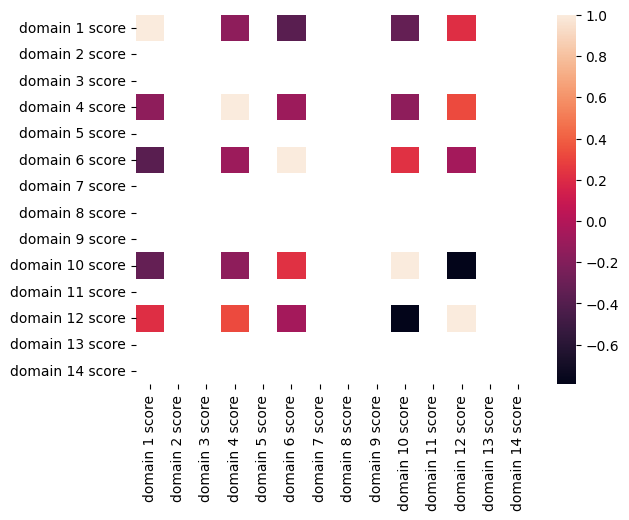

In [53]:
column_names = ["domain %d score" % i for i in range(1, 15)]
sns.heatmap(data_domain[column_names].corr())

In [54]:
df

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time_min,deficit_id,disorder_id,domain_id,progression_order,percentile
0,639141,15796,20,1,2,0.032,5y,1950,2014-08-02,2014-08-02 21:11:37,2014-08-02 21:11:40,"{1, 2, 3, 4, 8}","{2, 3}",1,0,0.010932
1,659924,16441,20,1,3,1.000,6m,1959,2014-08-08,2014-08-08 16:21:14,2014-08-08 16:21:54,"{1, 2, 3, 4}",{2},1,0,0.010932
2,677465,16441,20,1,3,1.000,6m,1959,2014-08-13,2014-08-13 01:07:54,2014-08-13 01:08:17,"{1, 2, 3, 4}",{2},1,0,0.010932
3,677586,16441,20,1,3,1.000,6m,1959,2014-08-13,2014-08-13 01:36:48,2014-08-13 01:37:13,"{1, 2, 3, 4}",{2},1,0,0.010932
4,679091,16441,20,1,3,1.000,6m,1959,2014-08-13,2014-08-13 16:15:30,2014-08-14 02:40:50,"{1, 2, 3, 4}",{2},1,0,0.010932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601853,4662260,82474,75,1,10,0.780,1y,1983,2016-09-20,2016-09-20 18:52:46,2016-09-20 18:57:20,"{1, 2, 3, 4}","{2, 3}",8,3,0.328086
1601854,4682259,82474,75,1,10,0.870,1y,1983,2016-09-22,2016-09-22 17:29:06,2016-09-22 17:33:08,"{1, 2, 3, 4}","{2, 3}",8,3,0.328086
1601855,4698670,82474,75,1,10,0.900,1y,1983,2016-09-24,2016-09-24 15:58:14,2016-09-24 16:03:42,"{1, 2, 3, 4}","{2, 3}",8,3,0.328086
1601856,4704074,82474,75,1,10,0.900,1y,1983,2016-09-25,2016-09-25 14:45:49,2016-09-25 14:53:32,"{1, 2, 3, 4}","{2, 3}",8,3,0.328086


In [10]:
scores_df = df.groupby("patient_id").apply(create_domain_scores).reset_index(drop=True)
scores_df

,domain 1 score,domain 2 score,domain 3 score,domain 4 score,domain 5 score,domain 6 score,domain 7 score,domain 8 score,domain 9 score,domain 10 score,domain 11 score,domain 12 score,domain 13 score,domain 14 score
0,0.759952,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473
1,0.759952,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473
2,0.759952,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473
3,0.759952,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473
4,0.759952,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601853,0.759952,0.24186,0.619994,0.358983,0.398848,0.473727,0.293455,0.260387,0.412225,0.311281,0.0,0.231094,0.428925,0.443473
1601854,0.759952,0.24186,0.619994,0.358983,0.398848,0.473727,0.293455,0.260387,0.412225,0.311281,0.0,0.231094,0.428925,0.778323
1601855,0.759952,0.24186,0.473520,0.358983,0.398848,0.473727,0.293455,0.260387,0.412225,0.311281,0.0,0.231094,0.428925,0.778323
1601856,0.759952,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473


<Axes: >

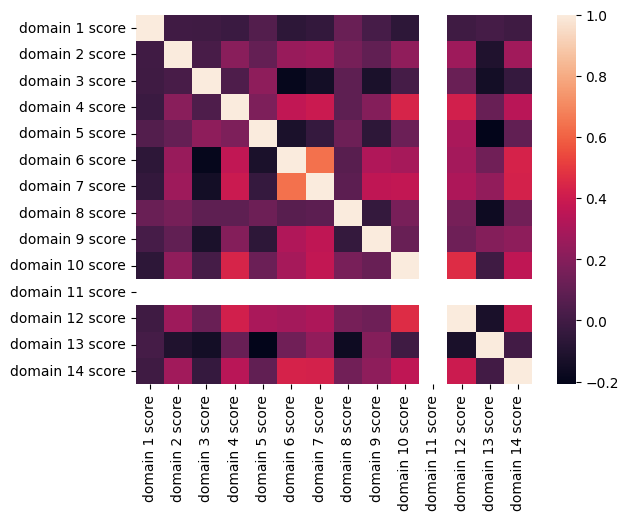

In [56]:
sns.heatmap(scores_df.corr())

In [11]:
from sklearn.preprocessing import MinMaxScaler

scores_df_minmax = MinMaxScaler().fit_transform(scores_df)

<Axes: >

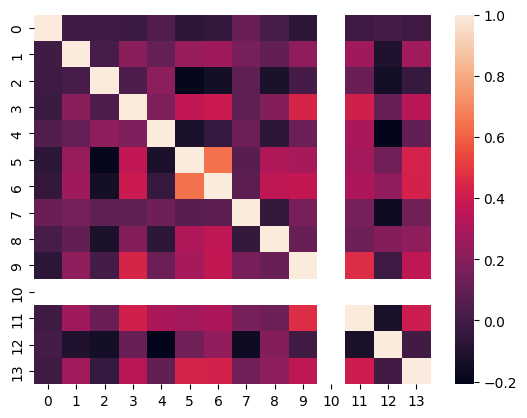

In [58]:
sns.heatmap(pd.DataFrame(scores_df_minmax).corr())

In [12]:
def new_score(row):
    score = None
    p = [1.05, 1.0, 0.9, 0.8]
    if row.accuracy > .90:
        score = row.percentile * p[0]
    elif row.accuracy > .60:
        score = row.percentile * p[1]
    elif row.accuracy > .40:
        score = row.percentile * p[2]
    else:
        score = row.percentile * p[3]
    return score

In [13]:
df_pscore = df.copy(deep=True)
df_pscore["percentile"] = df_pscore.apply(new_score, axis=1)
df_pscore

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time_min,deficit_id,disorder_id,domain_id,progression_order,percentile
0,639141,15796,20,1,2,0.032,5y,1950,2014-08-02,2014-08-02 21:11:37,2014-08-02 21:11:40,"{1, 2, 3, 4, 8}","{2, 3}",1,0,0.008745
1,659924,16441,20,1,3,1.000,6m,1959,2014-08-08,2014-08-08 16:21:14,2014-08-08 16:21:54,"{1, 2, 3, 4}",{2},1,0,0.011478
2,677465,16441,20,1,3,1.000,6m,1959,2014-08-13,2014-08-13 01:07:54,2014-08-13 01:08:17,"{1, 2, 3, 4}",{2},1,0,0.011478
3,677586,16441,20,1,3,1.000,6m,1959,2014-08-13,2014-08-13 01:36:48,2014-08-13 01:37:13,"{1, 2, 3, 4}",{2},1,0,0.011478
4,679091,16441,20,1,3,1.000,6m,1959,2014-08-13,2014-08-13 16:15:30,2014-08-14 02:40:50,"{1, 2, 3, 4}",{2},1,0,0.011478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601853,4662260,82474,75,1,10,0.780,1y,1983,2016-09-20,2016-09-20 18:52:46,2016-09-20 18:57:20,"{1, 2, 3, 4}","{2, 3}",8,3,0.328086
1601854,4682259,82474,75,1,10,0.870,1y,1983,2016-09-22,2016-09-22 17:29:06,2016-09-22 17:33:08,"{1, 2, 3, 4}","{2, 3}",8,3,0.328086
1601855,4698670,82474,75,1,10,0.900,1y,1983,2016-09-24,2016-09-24 15:58:14,2016-09-24 16:03:42,"{1, 2, 3, 4}","{2, 3}",8,3,0.328086
1601856,4704074,82474,75,1,10,0.900,1y,1983,2016-09-25,2016-09-25 14:45:49,2016-09-25 14:53:32,"{1, 2, 3, 4}","{2, 3}",8,3,0.328086


In [14]:
scores_df_pscore = df_pscore.groupby("patient_id").apply(create_domain_scores).reset_index(drop=True)
scores_df_pscore

,domain 1 score,domain 2 score,domain 3 score,domain 4 score,domain 5 score,domain 6 score,domain 7 score,domain 8 score,domain 9 score,domain 10 score,domain 11 score,domain 12 score,domain 13 score,domain 14 score
0,0.759952,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473
1,0.759952,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473
2,0.759952,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473
3,0.797949,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473
4,0.759952,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601853,0.683957,0.24186,0.557995,0.323085,0.398848,0.473727,0.293455,0.260387,0.412225,0.326845,0.0,0.231094,0.428925,0.443473
1601854,0.683957,0.24186,0.557995,0.323085,0.398848,0.473727,0.293455,0.260387,0.412225,0.326845,0.0,0.231094,0.428925,0.700490
1601855,0.683957,0.24186,0.473520,0.323085,0.398848,0.473727,0.293455,0.260387,0.412225,0.326845,0.0,0.231094,0.428925,0.700490
1601856,0.607961,0.24186,0.490635,0.358050,0.398848,0.416134,0.293455,0.260387,0.412225,0.353571,0.0,0.231094,0.428925,0.443473


<Axes: >

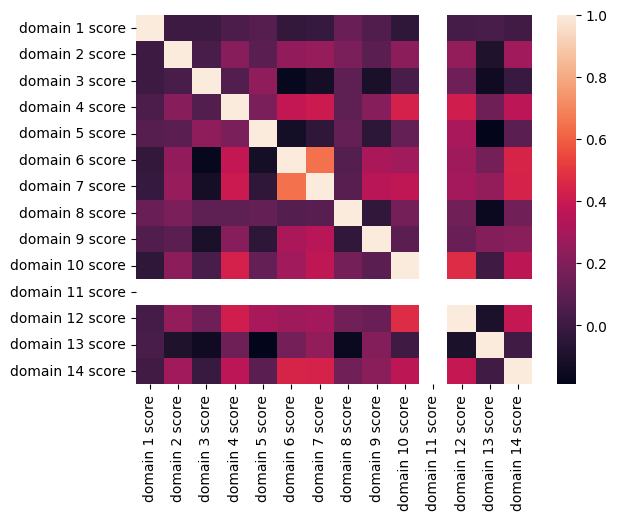

In [62]:
sns.heatmap(pd.DataFrame(scores_df_pscore).corr())

Variance

In [46]:
domain_avg = df.sort_values(by="end_time_min")
domain_avg = domain_avg.drop_duplicates(subset=["patient_id", "domain_id"])
initial = list(domain_avg.groupby("domain_id")["percentile"].mean().reset_index()["percentile"])


In [137]:
domain_avg

,id,patient_id,task_type_id,task_level,completed_task_count,accuracy,condition_since,birth_year,start_time,start_time_min,end_time_min,deficit_id,disorder_id,domain_id,progression_order,percentile
833990,583031,14189,30,1,2,0.625,5y,1970,2014-07-11,2014-07-11 22:04:14,2014-07-11 22:04:30,"{2, 4}",{3},14,0,0.007343
467149,583033,14189,9,1,3,0.667,5y,1970,2014-07-11,2014-07-11 22:07:34,2014-07-11 22:08:05,"{2, 4}",{3},6,5,0.050714
671552,583038,14189,24,2,2,0.945,5y,1970,2014-07-11,2014-07-11 22:21:27,2014-07-11 22:22:15,"{2, 4}",{3},12,6,0.146990
1117469,583039,14189,47,1,3,0.250,5y,1970,2014-07-11,2014-07-11 22:22:55,2014-07-11 22:24:04,"{2, 4}",{3},3,7,0.473520
829274,583041,14189,23,2,3,1.000,5y,1970,2014-07-11,2014-07-11 22:27:59,2014-07-11 22:28:15,"{2, 4}",{3},13,2,0.154591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545844,6406512,66575,63,3,5,0.200,>10y,1947,2017-03-19,2017-03-19 22:09:34,2017-03-19 23:50:53,"{3, 4, 5, 6, 7, 8}","{5, 9999}",7,2,0.125072
372936,6407135,108830,1,1,3,0.667,1y,1974,2017-03-19,2017-03-19 23:50:44,2017-03-19 23:51:08,"{1, 2, 3, 4, 5, 6, 7, 8}",{2},6,9,0.473727
1601636,6407187,103393,75,1,5,0.400,1y,1941,2017-03-19,2017-03-19 23:49:56,2017-03-19 23:51:09,"{8, 3, 4}",{3},8,3,0.328086
248663,6407136,108830,73,2,3,0.417,1y,1974,2017-03-19,2017-03-19 23:52:38,2017-03-19 23:54:43,"{1, 2, 3, 4, 5, 6, 7, 8}",{2},4,3,0.358983


1 0.6105328675086468
2 0.2418601162666269
3 0.49063491585919644
4 0.35805025370405125
5 0.3988477075918443
6 0.4161335139167553
7 0.29345525313450327
8 0.2603874012862501
9 0.41222472430027507
10 0.35357071025934894
11 0.0
12 0.23109449408791857
13 0.42892534428631485
14 0.44347347263711867


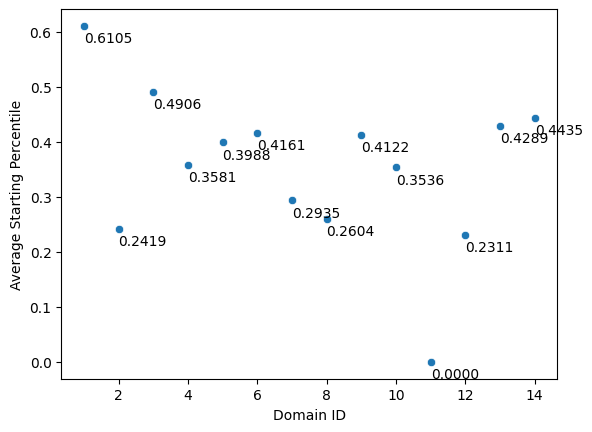

In [166]:
initial
domains = [i for i in range(1, 15)]
domains
sns.scatterplot(x=domains, y=initial)
plt.xlabel('Domain ID')
plt.ylabel('Average Starting Percentile')
for x, y in zip(domains, initial):
    plt.text(x = x, y = y-0.03, s = '%.4f' % y)

<Axes: title={'center': 'percentile'}, xlabel='[domain_id]'>

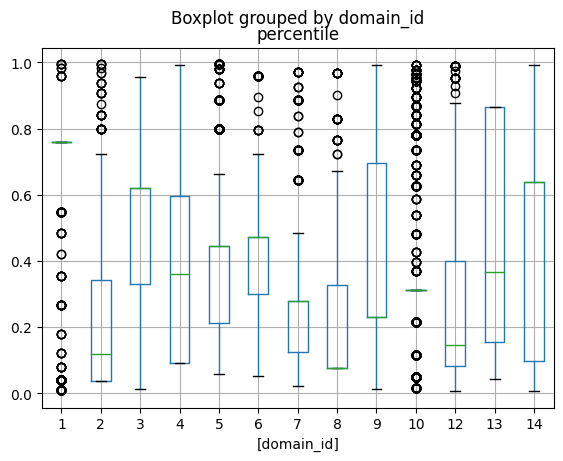

In [130]:
domain_avg[["domain_id", "percentile"]].boxplot(by="domain_id")

In [133]:
domain_initial = domain_avg[["domain_id", "percentile"]].reset_index(drop=True)

In [134]:
domain_initial

,domain_id,percentile
0,14,0.007343
1,6,0.050714
2,12,0.146990
3,3,0.473520
4,13,0.154591
...,...,...
20678,7,0.125072
20679,6,0.473727
20680,8,0.328086
20681,4,0.358983


In [135]:
domain_initial_std = domain_initial.groupby("domain_id")["percentile"].std()

<Axes: xlabel='domain_id'>

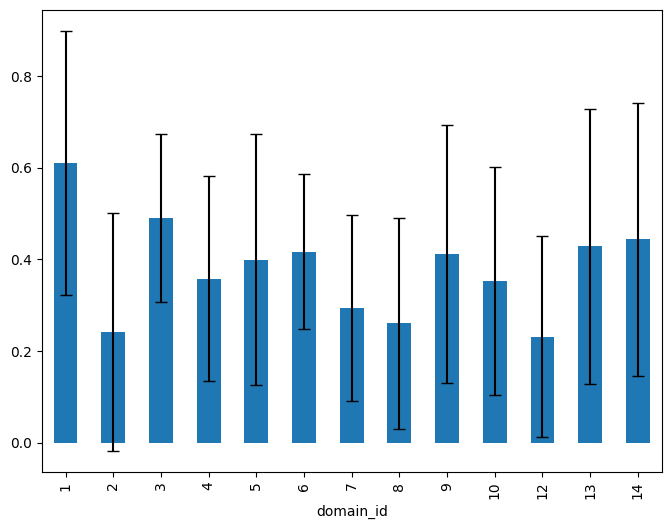

In [136]:
fig, ax = plt.subplots(figsize=(8,6))
domain_initial.groupby("domain_id")["percentile"].mean().plot.bar(yerr=domain_initial_std, capsize=4)

K-means

In [167]:
from sklearn.cluster import KMeans

In [237]:
temp = scores_df_pscore.copy(deep=True).transpose()
temp.shape

(14, 1601858)

In [179]:
# little test sample
Kmean = KMeans(n_clusters=3)
Kmean.fit_predict(temp)
Kmean.labels_

array([0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0], dtype=int32)

In [ ]:
# 1 min 30 seconds
temp.columns = temp.columns.astype(str)
sse = dict()
for k in range(1, 14):
    kmeans = KMeans(n_clusters=k, max_iter=1000)
    kmeans.fit_predict(temp)
    temp["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

Text(0, 0.5, 'SSE')

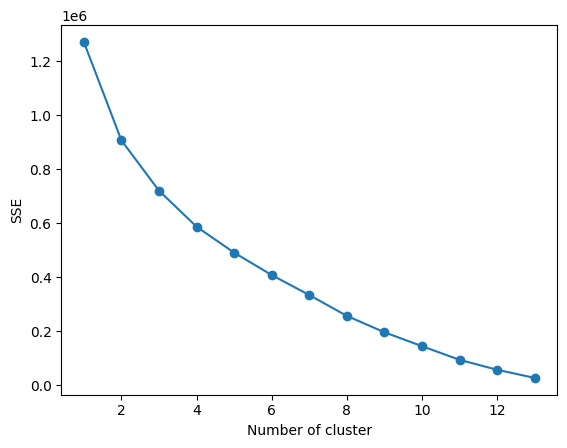

In [184]:
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")

In [238]:
np.random.seed(123)
temp.columns = temp.columns.astype(str)
kmeans = KMeans(n_clusters=4, max_iter=1000)
kmeans.fit_predict(temp)
temp["clusters"] = kmeans.labels_

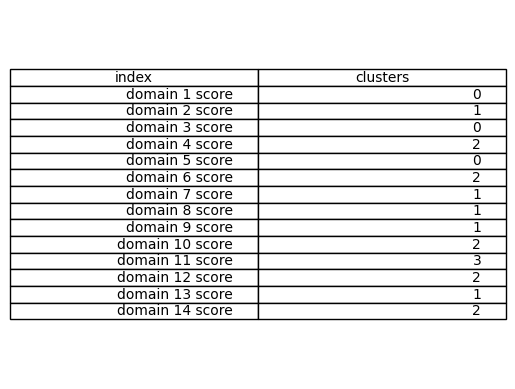

In [219]:
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

temp = temp["clusters"].reset_index()

ax.table(cellText=temp.values, colLabels=temp.columns, loc='center')

# fig.tight_layout()

plt.show()

PCA

In [2]:
from sklearn.decomposition import PCA

In [15]:
temp = scores_df_pscore.copy(deep=True)

In [16]:
pca=PCA(n_components=0.95)
PC=pca.fit_transform(temp)
pc_names = ["pc%d" % i for i in range(1, PC.shape[1]+1)]
principalDF = pd.DataFrame(data=PC,columns=pc_names)
principalDF

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-0.375741,0.092819,0.241786,-0.019083,-0.030118,0.072771,-0.004320,0.012550,-0.010833,-0.007290,0.018723
1,-0.375741,0.092819,0.241786,-0.019083,-0.030118,0.072771,-0.004320,0.012550,-0.010833,-0.007290,0.018723
2,-0.375741,0.092819,0.241786,-0.019083,-0.030118,0.072771,-0.004320,0.012550,-0.010833,-0.007290,0.018723
3,-0.375145,0.087479,0.277561,-0.028976,-0.031140,0.072580,-0.003949,0.013124,-0.010946,-0.012125,0.022128
4,-0.375741,0.092819,0.241786,-0.019083,-0.030118,0.072771,-0.004320,0.012550,-0.010833,-0.007290,0.018723
...,...,...,...,...,...,...,...,...,...,...,...
1601853,-0.383500,0.100191,0.169780,0.025780,-0.061262,0.018152,0.021588,0.029219,0.026911,-0.032583,0.026233
1601854,-0.294943,0.133882,0.184539,0.071487,-0.101714,0.015675,0.179763,0.022552,-0.137123,-0.041087,-0.002122
1601855,-0.298056,0.163874,0.193060,0.074458,-0.097067,0.089046,0.169365,0.003716,-0.143026,-0.026100,-0.005218
1601856,-0.378125,0.114182,0.098688,0.020491,-0.026030,0.073538,-0.005805,0.010256,-0.010381,0.012051,0.005106


In [18]:
exp_var_pca = pca.explained_variance_ratio_
exp_var_pca

array([0.29572113, 0.14873234, 0.10576031, 0.07455796, 0.0633785 ,
       0.05948124, 0.0567189 , 0.0459193 , 0.04086456, 0.03728615,
       0.02947345])

Bad pipe message: %s [b'\xb2y\xe7o\xc5,\x08\xb5\xdb\x1b\x96\x00\x0f\xe6\xfao\x16\xb8\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B\x00C\x00D\x00E\x00F\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\x96\x00\x97\x00\x98\x00\x99\x00\x9a\x00\x9b\x00\x9c\x00\x9d\x00\x9e\x00\x9f\x00\xa0\x00\xa1\x00\xa2\x00\xa3\x00\xa4\x00\xa5\x00\xa6\x00\xa7\x00\xba\x00\xbb\x00\xbc\x00\xbd\x00\xbe\x00\xbf\x00', b"\xc1\x00\xc2\x00\xc3\x00\xc4\x00\xc5\x13\x01\x13\x02\x13\x03\x13\x04\x13\x05\xc0\x01\xc0\x02\xc0\x03\xc0\x04\xc0\x05\xc0\x06\xc0\x07\xc0\x08\xc0\t\xc0\n\xc0\x0b\xc0\x0c\xc0\r\xc0\x0e\xc0\x0f\xc0\x10\xc0\x11\xc0\x12\xc0\x13\xc0\x14\xc0\x15\xc0\x16\xc0\x17\xc0\x18\xc0\x19\xc0#\xc0$\xc0%

In [233]:
pca=PCA(n_components=0.90)
PC=pca.fit_transform(temp)
pc_names = ["pc%d" % i for i in range(1, PC.shape[1]+1)]
principalDF = pd.DataFrame(data=PC,columns=pc_names)
principalDF

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-0.375741,0.092819,0.241786,-0.019083,-0.030118,0.072771,-0.004320,0.012550,-0.010833,-0.007290
1,-0.375741,0.092819,0.241786,-0.019083,-0.030118,0.072771,-0.004320,0.012550,-0.010833,-0.007290
2,-0.375741,0.092819,0.241786,-0.019083,-0.030118,0.072771,-0.004320,0.012550,-0.010833,-0.007290
3,-0.375145,0.087479,0.277561,-0.028976,-0.031140,0.072580,-0.003949,0.013124,-0.010946,-0.012125
4,-0.375741,0.092819,0.241786,-0.019083,-0.030118,0.072771,-0.004320,0.012550,-0.010833,-0.007290
...,...,...,...,...,...,...,...,...,...,...
1601853,-0.383500,0.100191,0.169780,0.025780,-0.061262,0.018152,0.021588,0.029219,0.026911,-0.032583
1601854,-0.294943,0.133882,0.184539,0.071487,-0.101714,0.015675,0.179763,0.022552,-0.137123,-0.041087
1601855,-0.298056,0.163874,0.193060,0.074458,-0.097067,0.089046,0.169365,0.003716,-0.143026,-0.026100
1601856,-0.378125,0.114182,0.098688,0.020491,-0.026030,0.073538,-0.005805,0.010256,-0.010381,0.012051


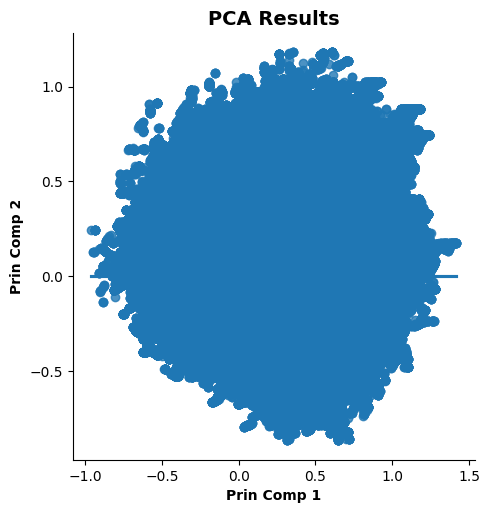

In [248]:
sns.lmplot(data=principalDF, x='pc1', y='pc2')
plt.title('PCA Results', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight= 'bold').set_fontsize('10')
plt.ylabel ('Prin Comp 2' , weight='bold').set_fontsize('10')

t-SNE

In [249]:
from sklearn.manifold import TSNE

In [252]:
temp = scores_df_pscore.copy(deep=True)

In [253]:
tsne = TSNE(learning_rate=100)
tsne.fit_transform(temp)

AttributeError: 'TSNE' object has no attribute 'shape'